In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784.00,0
1,5175-AOBHI,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.60,1
2,6922-NCEDI,Male,0,No,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,3143-ILDAL,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.60,1
4,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.40,1


In [4]:
# for getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


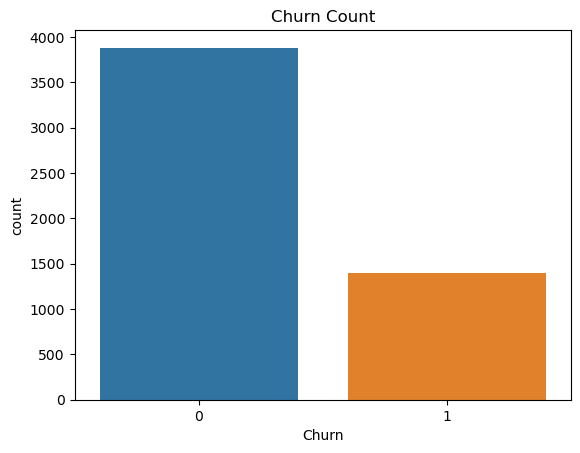

In [5]:
# To visualise chrning trends
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()

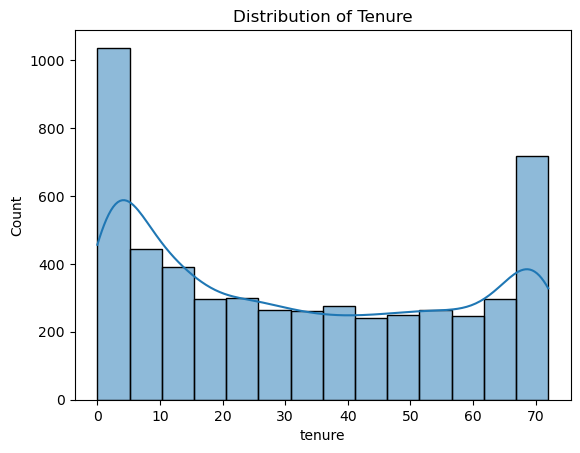

In [6]:
# To visualise the churning trends as per distribution of Tenure
sns.histplot(data=df, x='tenure', kde=True)
plt.title('Distribution of Tenure')
plt.show()

# Obsevation
    # Either New or Old customers are churning more, Customers
    # Customers with Tenure 25 to 65 are somewhat stable as compared to very new and very old customers

In [8]:
df.drop(['customerID', 'TotalCharges'] , axis=1, inplace=True)

In [9]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,Yes,72,No,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,0
1,Female,0,No,No,4,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,1
2,Male,0,No,Yes,56,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,0


In [10]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols_encoded = pd.get_dummies(categorical_cols, drop_first=True)
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
encoded_df = pd.concat([numeric_cols, categorical_cols_encoded], axis=1)

In [11]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5282 non-null   int64  
 1   tenure                                 5282 non-null   int64  
 2   MonthlyCharges                         5282 non-null   float64
 3   Churn                                  5282 non-null   int64  
 4   gender_Male                            5282 non-null   uint8  
 5   Partner_Yes                            5282 non-null   uint8  
 6   Dependents_Yes                         5282 non-null   uint8  
 7   PhoneService_Yes                       5282 non-null   uint8  
 8   MultipleLines_No phone service         5282 non-null   uint8  
 9   MultipleLines_Yes                      5282 non-null   uint8  
 10  InternetService_Fiber optic            5282 non-null   uint8  
 11  Inte

In [12]:
df = encoded_df

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])

In [14]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1.609608,-0.371461,0,0,1,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0
1,0,-1.151780,-0.625032,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0.959870,-1.447065,0,1,0,1,1,0,0,...,1,0,1,0,1,0,1,0,0,1
3,0,0.959870,0.980917,1,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0,-0.948737,0.487034,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=13)

In [17]:
len(df_test), len(df_train)

(1057, 4225)

In [18]:
y_train = df_train.Churn
y_test = df_test.Churn

In [19]:
X_train = df_train.drop(['Churn'], axis = True)
X_test = df_test.drop(['Churn'], axis = True)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.30576892517147586
Mean Squared Error (MSE): 0.14291520296907018
Root Mean Squared Error (RMSE): 0.37804127151551875
R-squared (R²): 0.2539813317541737
